## Detect and Remove Outliers in the Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns;
import matplotlib.pyplot as plt

In [9]:
winedata = pd.read_csv("./Data/wine/winequalityN.csv")



In [10]:
winedata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


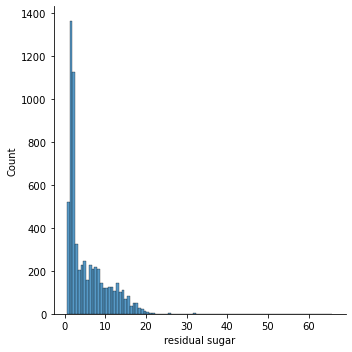

In [12]:
sns.displot(winedata['residual sugar'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

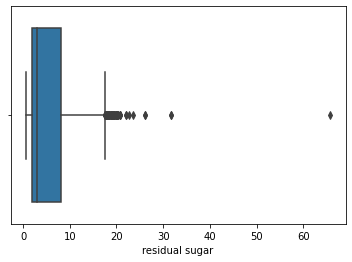

In [15]:
sns.boxplot(winedata['residual sugar'])

## Z - Score method
z = (x – μ) / σ

Z = standard score
x =observed value
μ = mean of the sample
σ =  standard deviation of the sample


In [17]:
upperLimit = winedata['residual sugar'].mean() + 3*winedata['residual sugar'].std()
lowerLimit = winedata['residual sugar'].mean() - 3*winedata['residual sugar'].std()

In [19]:
print('Upper limit : ', upperLimit , 'Lower Limits : ', lowerLimit)

Upper limit :  19.71870063294501 Lower Limits :  -8.830047823091236


In [29]:
## find the outliers

winedata.loc[(winedata['residual sugar'] > upperLimit) | (winedata['residual sugar'] < lowerLimit)].head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


## Meethods

#### Trimming -  deleting the outliers

In [32]:
df_triming = winedata.loc[(winedata['residual sugar'] < upperLimit) & (winedata['residual sugar'] > lowerLimit)]

In [34]:
df_triming.head()
print('Old Data' , len(winedata))
print('New Data' , len(df_triming))

Old Data 6497
New Data 6469


<AxesSubplot:xlabel='residual sugar'>

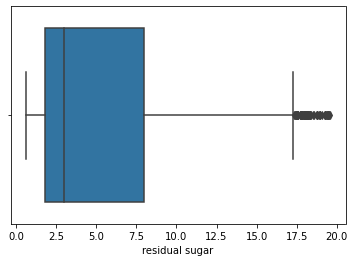

In [36]:
sns.boxplot(df_triming['residual sugar'])

#### Capping - Change the Outlierd value to upper or lower limits

In [50]:
df_capping = winedata .copy()

In [51]:
df_capping.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [52]:
df_capping.loc[(df_capping['residual sugar'] > upperLimit) , 'residual sugar'] = upperLimit
df_capping.loc[(df_capping['residual sugar'] < lowerLimit) , 'residual sugar'] = lowerLimit

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

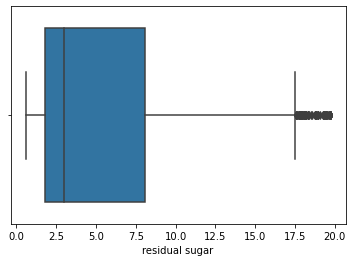

In [55]:
sns.boxplot(df_capping['residual sugar'])

## IQR

In [56]:
q1 = winedata['residual sugar'].quantile(0.25)
q3 = winedata['residual sugar'].quantile(0.75)
iqr  =  q3 - q1

In [57]:
iqr

6.3

In [60]:
upper_limits = q3 + (1.5 * iqr)
lower_limits = q1 - (1.5 * iqr)

In [61]:
print('Upper limit : ', upper_limits , 'Lower Limits : ', lower_limits)

Upper limit :  17.549999999999997 Lower Limits :  -7.6499999999999995


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

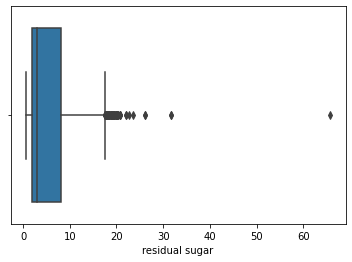

In [62]:
sns.boxplot(winedata['residual sugar'])

In [63]:
## Triming 

df_triming_iqr = winedata.loc[(winedata['residual sugar'] < upper_limits) & (winedata['residual sugar'] > lower_limits)]
print('before removing outliers', len(winedata))
print('After removing outliers', len(df_triming_iqr))
print('outliers', len(winedata) - len(df_triming_iqr))

before removing outliers 6497
After removing outliers 6377
outliers 120


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

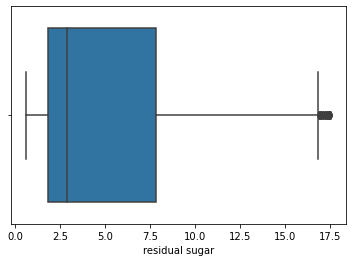

In [65]:
sns.boxplot(df_triming_iqr['residual sugar'])

In [68]:
## Capping

df_capping_iqr = winedata .copy()
df_capping_iqr.loc[(df_capping_iqr['residual sugar'] > upper_limits) , 'residual sugar'] = upper_limits
df_capping_iqr.loc[(df_capping_iqr['residual sugar'] < lower_limits) , 'residual sugar'] = lower_limits


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

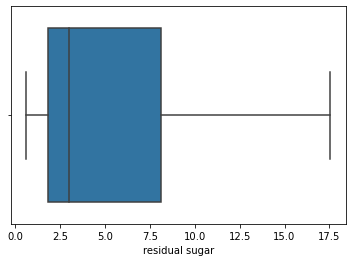

In [67]:
sns.boxplot(df_capping_iqr['residual sugar'])

## Percentile Method

In [72]:
upper_limit = winedata['residual sugar'].quantile(0.99)
lower_limit = winedata['residual sugar'].quantile(0.01)
print('Upper limit : ', upper_limit , 'Lower Limits : ', lower_limit)

Upper limit :  18.2 Lower Limits :  0.9


In [76]:
# trimming

df_triming_perc = winedata.loc[(winedata['residual sugar'] < upper_limit) & (winedata['residual sugar'] > lower_limit)]
print('before removing outliers', len(winedata))
print('After removing outliers', len(df_triming_perc))
print('outliers', len(winedata) - len(df_triming_perc))

before removing outliers 6497
After removing outliers 6354
outliers 143


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

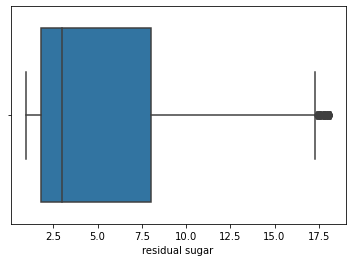

In [77]:
sns.boxplot(df_triming_perc['residual sugar'])

In [84]:
## Capping

df_capping_perc_cap = winedata .copy()
df_capping_perc_cap.loc[(df_capping_perc_cap['residual sugar'] > upper_limit) , 'residual sugar'] = upper_limit
df_capping_perc_cap.loc[(df_capping_perc_cap['residual sugar'] < lower_limit) , 'residual sugar'] = lower_limit

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

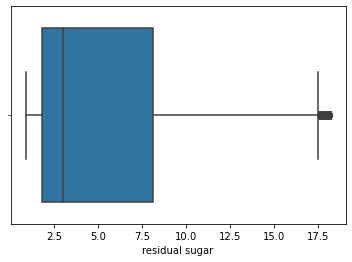

In [85]:
sns.boxplot(df_capping_perc_cap['residual sugar'])

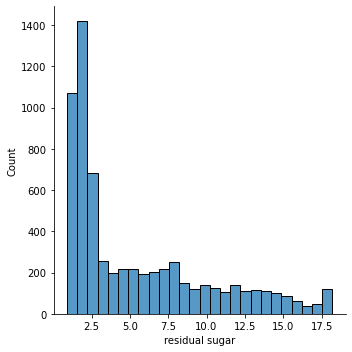

In [86]:
sns.displot(df_capping_perc_cap['residual sugar'])